# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
import os

# Analyzing the Data

In [4]:
# Loading the dataset
df = pd.read_csv("day.csv")

In [5]:
# Understanding the data by looking at its top rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Brief Information of the Data

print("Shape of the dataset: ", df.shape)
print("\n")
print(df.info())

Shape of the dataset:  (730, 16)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [7]:
# Checking for columns that have only one value

single_value_columns = df.columns[(df.nunique() == 1)]
single_value_columns
# No such columns were found

Index([], dtype='object')

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# Removing Irrelevant Columns

irrelevant_columns = ['instant', 'dteday','casual', 'registered']
df.drop(irrelevant_columns, axis=1, inplace=True)

### Note:

Reason for removing above columns:
1. "instant" column doesn't serve any purpose here, because it's just the serial number, which is being compensated by the index number.
2. "dteday" column contains date and of no use here because our aim is to see the trend of bike demand, and it doesn't make sense to visualize the trend on a daily basis for such problems. Also, we have the columns for month and year to compensate for this.

In [10]:
# Checking duplicate rows in the dataset

df[(df.duplicated())]

# No duplicity was found in the dataset

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


# Standardizing Values

In [11]:
# Renaming column name for better readability

df.columns = ["Season", "Year", "Month", "Holiday", "Weekday", "Working_Day", "Weather", "Temp", "Feel_Temp", "Humidity", "Wind_Speed", "Total_Users"]

### Note:
The number of decimal places in following columns doesn't make any sense, so reducing the decimal places to 1.

In [12]:
columns_rounding = ["Temp", "Feel_Temp", "Humidity", "Wind_Speed"]
df[columns_rounding] = df[columns_rounding].round(1)
df.head(2)

,Season,Year,Month,Holiday,Weekday,Working_Day,Weather,Temp,Feel_Temp,Humidity,Wind_Speed,Total_Users
0,1,0,1,0,6,0,2,14.1,18.2,80.6,10.7,985
1,1,0,1,0,0,0,2,14.9,17.7,69.6,16.7,801


In [13]:
# Mapping "Season" column to String using data dictionary
dict_map_season = {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}
df["Season"] = df['Season'].map(dict_map_season)


# Mapping "Year" column to String using data dictionary
dict_map_year = {0: 2018, 1:2019}
df["Year"] = df['Year'].map(dict_map_year).astype(str)


# Mapping "Weather" column to String using data dictionary
dict_map_weather = {1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Heavy Rain"}
df["Weather"] = df['Weather'].map(dict_map_weather)


# Mapping "Holiday" column to String
dict_map_holiday = {0:"No", 1:"Yes"}
df["Holiday"] = df['Holiday'].map(dict_map_holiday)


# Mapping "Weekday" column to String
dict_map_weekday = {0:"Tue", 1:"Wed", 2:"Thu", 3:"Fri", 4:"Sat", 5:"Sun", 6:"Mon"}
df["Weekday"] = df['Weekday'].map(dict_map_weekday)


# Mapping "Working_Day" column to String
dict_map_workingday = {0:"No", 1:"Yes"}
df["Working_Day"] = df['Working_Day'].map(dict_map_workingday)


# Converting "Month" into "Object"
df["Month"] = df["Month"].astype("object")

### Note:
Although, we'll convert the categorical variables to dummy variables before building the model, mapping will make the charts easily interpretable for EDA.

In [14]:
df.head(2)

,Season,Year,Month,Holiday,Weekday,Working_Day,Weather,Temp,Feel_Temp,Humidity,Wind_Speed,Total_Users
0,Spring,2018,1,No,Mon,No,Mist,14.1,18.2,80.6,10.7,985
1,Spring,2018,1,No,Tue,No,Mist,14.9,17.7,69.6,16.7,801


# EDA

In [15]:
# Creating categorical and continuous variable columns list for easy plotting

cat_column = ['Season', 'Year', 'Month', 'Holiday', 'Weekday', 'Working_Day','Weather']
cont_column = ['Temp', 'Feel_Temp', 'Humidity', 'Wind_Speed','Total_Users']

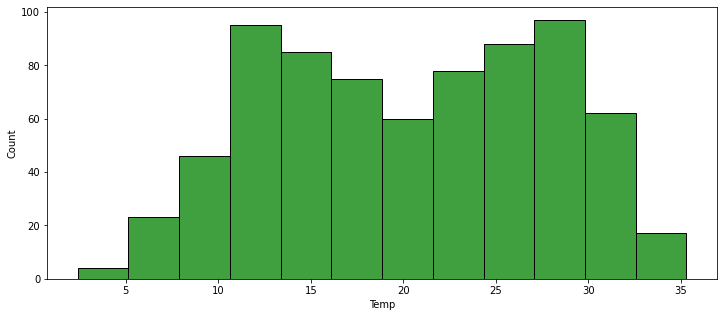

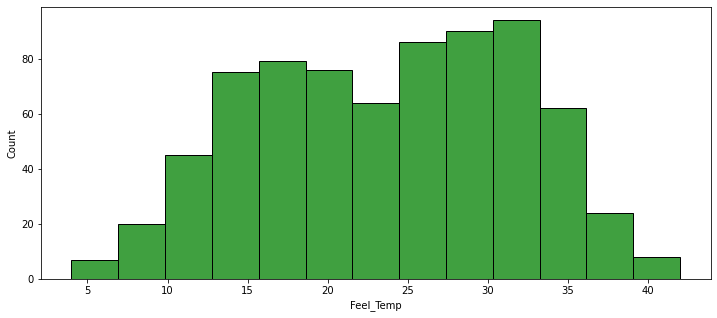

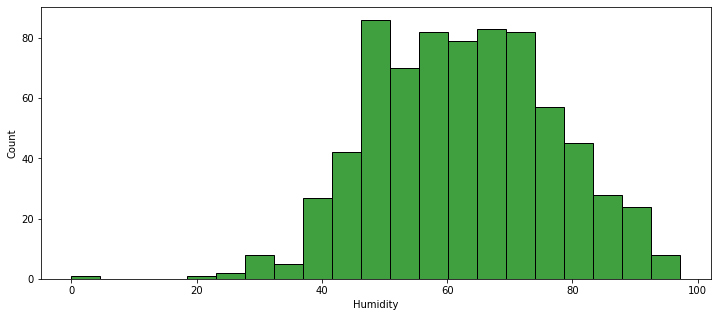

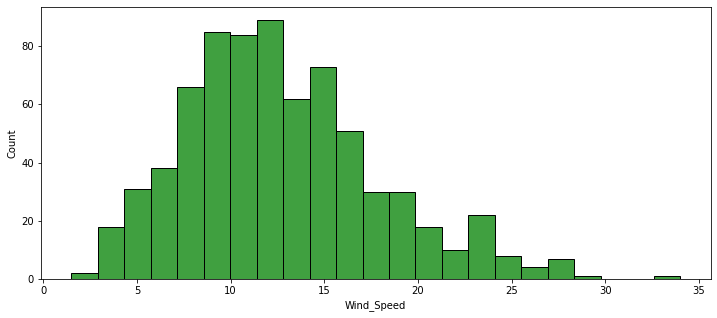

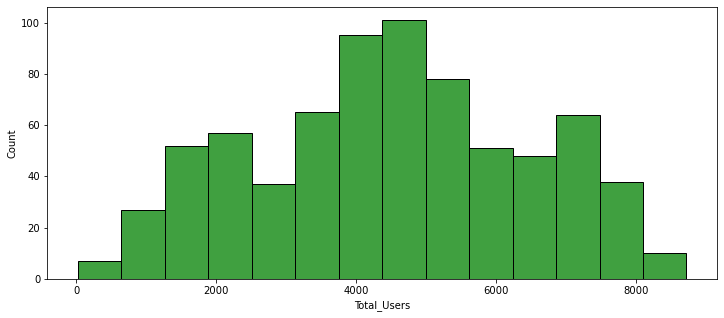

In [16]:
# Histogram

for i in cont_column:
    plt.figure(figsize=(12,5))
    sns.histplot(df[i], color="Green")
    plt.show()

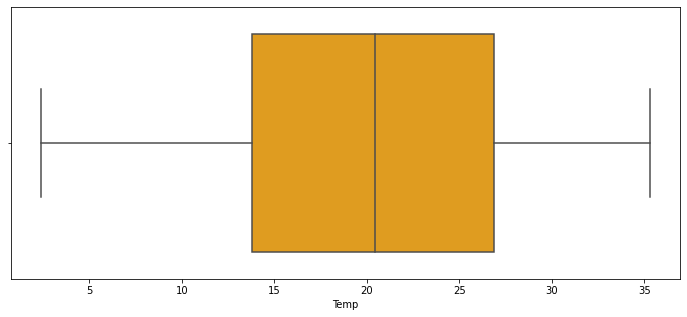

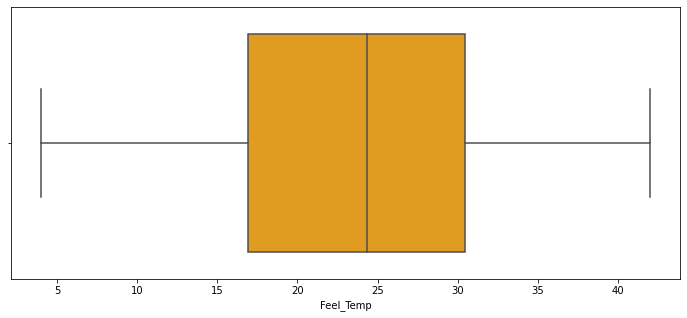

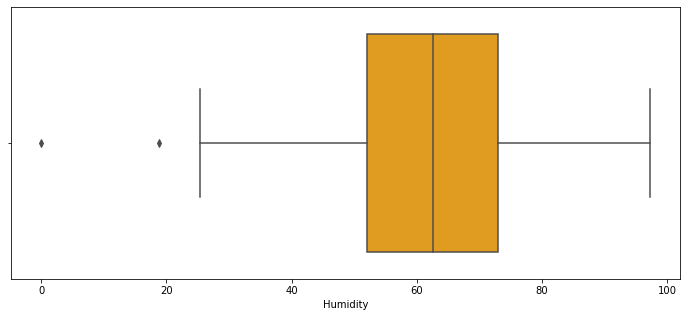

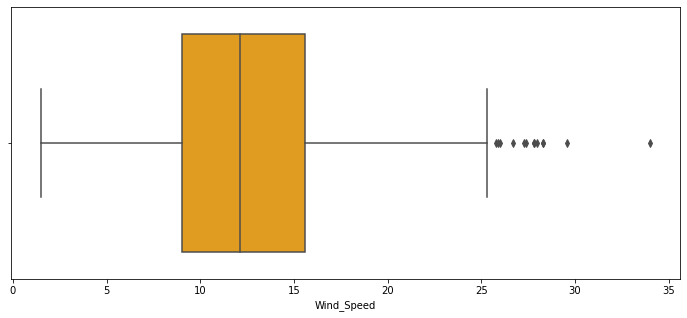

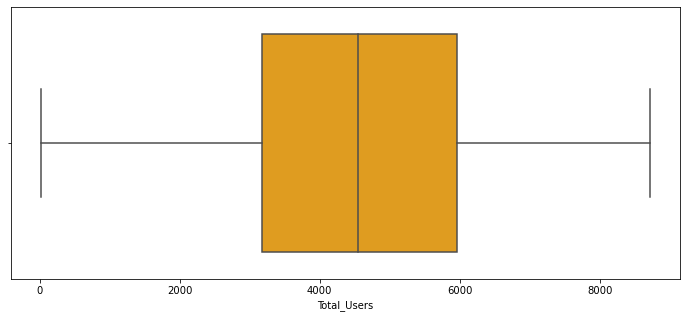

In [17]:
#Boxplots

for i in cont_column:
    plt.figure(figsize=(12,5))
    sns.boxplot(df[i], color="Orange")
    plt.show()

### Note:

We can see from the above boxplots that there are three variables: "Humidity", "Wind_Speed", and "Casual_Users" that have outliers. However, none of them (except 0 humidity) is likely to be data entry errors, so we'll not remove them as represent natural variations in the population.

We'll only remove zero humidity from the dataset, as it is not possible on earth's atmosphere.

In [18]:
# Removing Outliers from "Humidity"

df = df[(df["Humidity"]>0)]

In [19]:
df.head(2)

,Season,Year,Month,Holiday,Weekday,Working_Day,Weather,Temp,Feel_Temp,Humidity,Wind_Speed,Total_Users
0,Spring,2018,1,No,Mon,No,Mist,14.1,18.2,80.6,10.7,985
1,Spring,2018,1,No,Tue,No,Mist,14.9,17.7,69.6,16.7,801


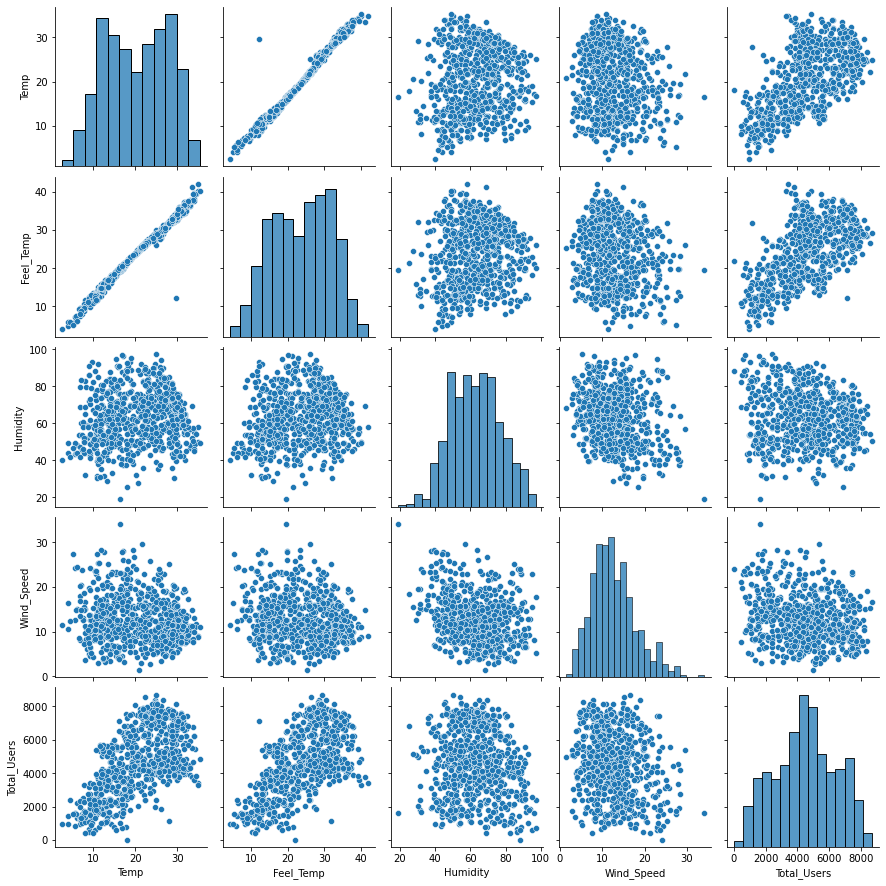

In [20]:
# Pairplots

sns.pairplot(df[cont_column], vars=["Temp", "Feel_Temp", "Humidity", "Wind_Speed", "Total_Users"])
plt.show()

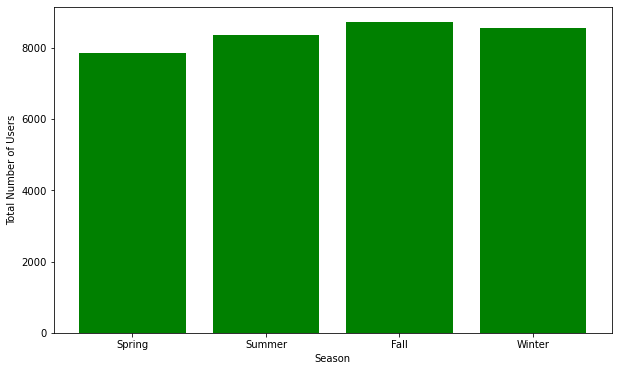

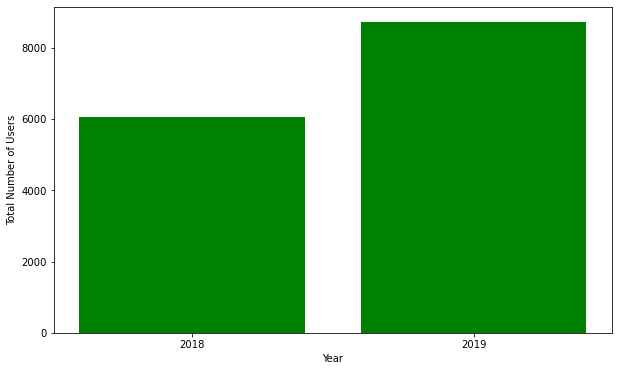

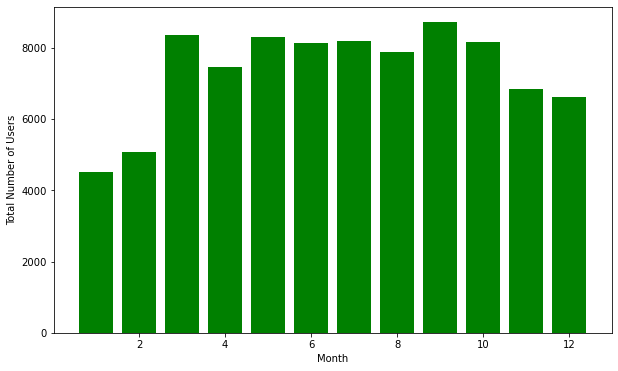

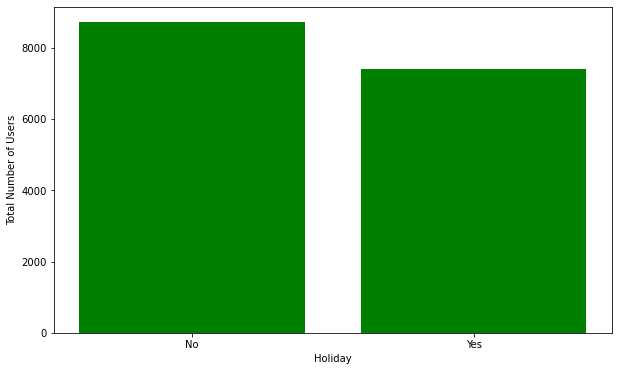

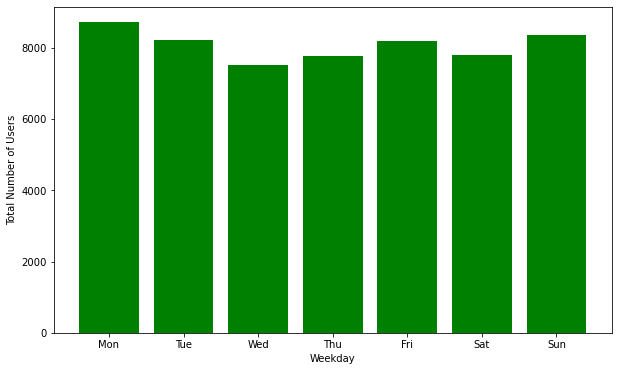

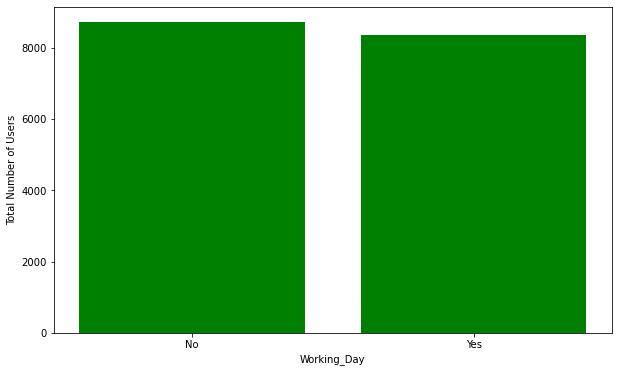

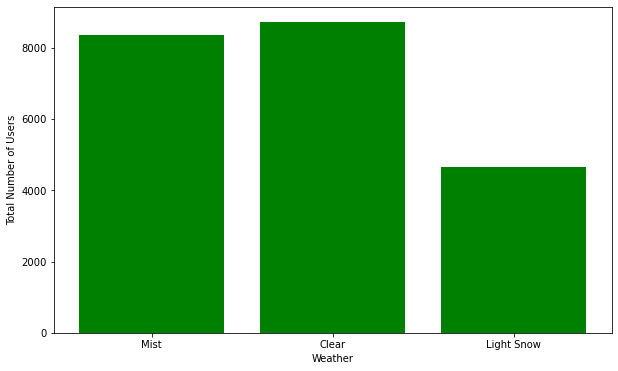

In [21]:
# How Total Number of Users Vary as per different categorical variables

for i in cat_column:
    plt.figure(figsize=(10,6))
    plt.bar(x=df[i], height=df["Total_Users"], color="Green")
    plt.xlabel(i)
    plt.ylabel("Total Number of Users")
    plt.show()

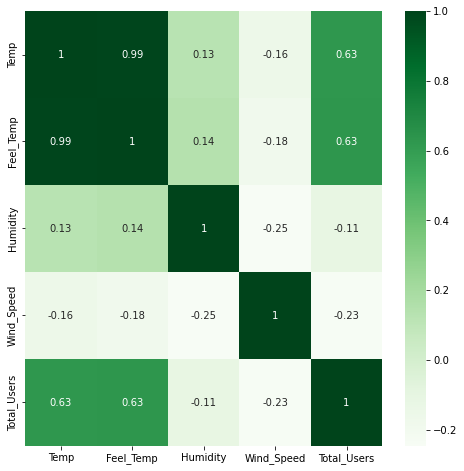

In [22]:
# Correlation between variables using heatmap

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap="Greens")
plt.show()

# Model Building

## Pre-Processing

In [23]:
# Splitting the data into Independent Variable and Target Variable

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [24]:
X

,Season,Year,Month,Holiday,Weekday,Working_Day,Weather,Temp,Feel_Temp,Humidity,Wind_Speed
0,Spring,2018,1,No,Mon,No,Mist,14.1,18.2,80.6,10.7
1,Spring,2018,1,No,Tue,No,Mist,14.9,17.7,69.6,16.7
2,Spring,2018,1,No,Wed,Yes,Clear,8.1,9.5,43.7,16.6
3,Spring,2018,1,No,Thu,Yes,Clear,8.2,10.6,59.0,10.7
4,Spring,2018,1,No,Fri,Yes,Clear,9.3,11.5,43.7,12.5
...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,2019,12,No,Sat,Yes,Mist,10.4,11.3,65.3,23.5
726,Spring,2019,12,No,Sun,Yes,Mist,10.4,12.8,59.0,10.4
727,Spring,2019,12,No,Mon,No,Mist,10.4,12.1,75.3,8.3
728,Spring,2019,12,No,Tue,No,Clear,10.5,11.6,48.3,23.5


In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [26]:
ohenc = OneHotEncoder()
ct = ColumnTransformer(transformers=[("encoder", ohenc, [0, 1, 2, 3, 4, 5, 6])], remainder="passthrough")
X = ct.fit_transform(X)

In [27]:
# Splitting into Training and Testing Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [28]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit and Transform training dataset of feature matrix

X_train[:,-4:] = sc.fit_transform(X_train[:,-4:])


# Transforming test dataset of Feature Matrix

X_test[:,-4:] = sc.transform(X_test[:,-4:])

## Feature Selection

In [29]:
# Recursive feature elimination with cross-validation

from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


# Feeding the model to RFECV
rfecv = RFECV(estimator=lr)

# Fitting to the model
rfecv_fit = rfecv.fit(X_train, y_train)

In [30]:
# Getting the Features selected by RFECV

df_features = pd.DataFrame(columns = ['Feature', 'Support', 'Ranking'])

for i in range(X.shape[1]):
    row = {'Feature': i, 'Support': rfecv.support_[i], 'Ranking': rfecv.ranking_[i]}
    df_features = df_features.append(row, ignore_index=True)
    
df_features.sort_values(by='Feature')

,Feature,Support,Ranking
0,0,True,1
1,1,True,1
2,2,True,1
3,3,True,1
4,4,True,1
5,5,True,1
6,6,True,1
7,7,True,1
8,8,True,1
9,9,True,1


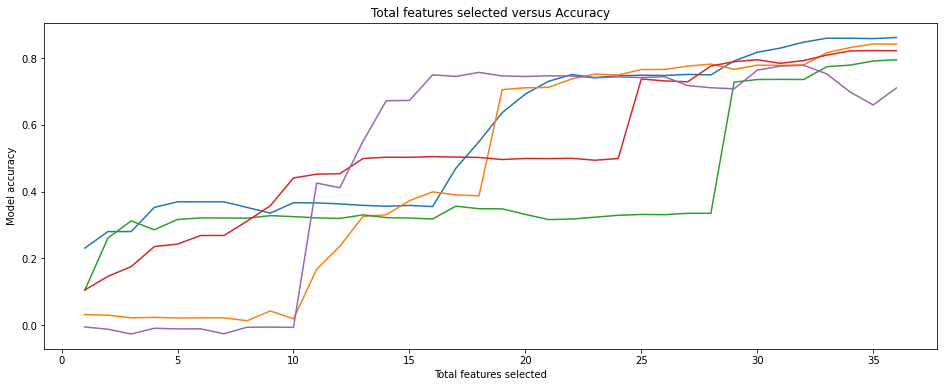

In [31]:
# Plot number of features VS. cross-validation scores
plt.figure( figsize=(16, 6))
plt.title('Total features selected versus Accuracy')
plt.xlabel('Total features selected')
plt.ylabel('Model accuracy')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [32]:
# Transforming the X_train and X_test

X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

# Regression Using Scikit-Learn 

In [33]:
# Building and fitting Model

lr.fit(X_train_rfecv, y_train)

LinearRegression()

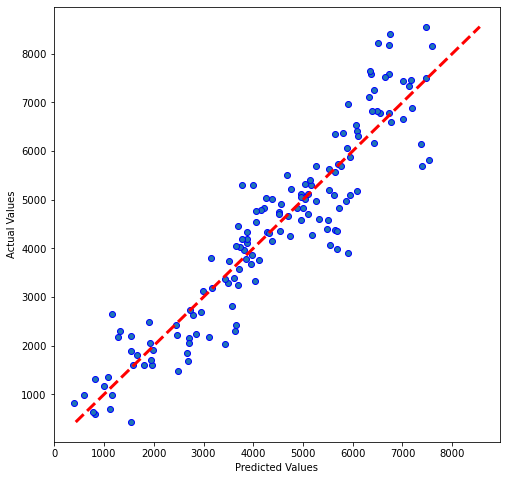

In [34]:
# Predicting the outcome

y_pred_test = lr.predict(X_test)


# Comparing Predicted outcome with the actual values

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_pred_test, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()

# Model Evaluation

In [35]:
# Model Evaluation for Test Set

from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred_test)
mse = metrics.mean_squared_error(y_test, y_pred_test)
r2 = metrics.r2_score(y_test, y_pred_test)


# Computing Adjusted R-square

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)



print("The model performance for testing set")
print("--------------------------------------")
print('Mean Absolute Error : {}'.format(round(mae, 2)))
print('Mean Squared Error  : {}'.format(round(mse, 2)))
print('R2 score            : {}'.format(round(r2, 2)))
print('Adjusted R2 score   : {}'.format(round(adjusted_r2, 2)))

The model performance for testing set
--------------------------------------
Mean Absolute Error : 546.6
Mean Squared Error  : 514523.77
R2 score            : 0.87
Adjusted R2 score   : 0.82
